# Introduction

In this first step we will be loading the data and making a very general overview in some its properties.

# Imports

In [ ]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split

# Loading the Data

First we will load the original data downloaded from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification/tasks?taskId=1719). The data consists of 23 atributes and 8,124 observations of mushrooms. The objective of this project is to create a model that can predict if a mushroom is edible. As such, we can use all the other 22 atributes to predict our target variable.

In [2]:
file_path = "data/mushrooms.csv"

df = pd.read_csv(file_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
target = "class"
y = df[target]
X = df.drop(target, axis=1)

# Spliting the data

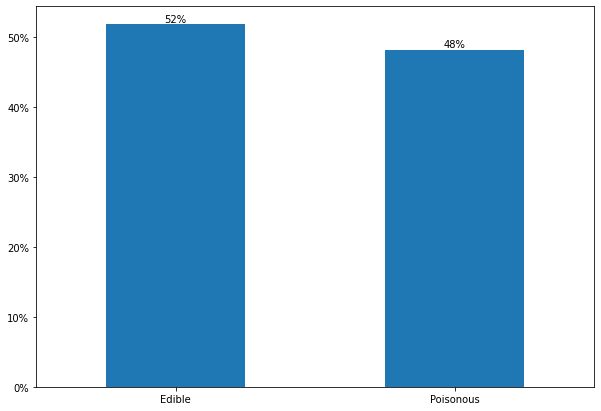

In [5]:
cat_labels = {"e": "Edible",
              "p": "Poisonous"}

y_freq = y.map(cat_labels).value_counts(normalize=True).mul(100)

ax = y_freq.plot(kind="bar", figsize=[10,7])
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
data_labels = [f"{str(round(freq))}%" for freq in y_freq.tolist()]
ax.bar_label(ax.containers[0], label_type='edge', labels=data_labels)

plt.show();

In [6]:
y = y.map({"e": 1, "p": 0})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

data = {"X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test}

with open("data/splited_data.pickle", "wb") as file:
    pickle.dump(data, file)